In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [42]:
df = pd.read_excel("/content/GRAB APP AND API DATA.xlsx", skiprows=13)

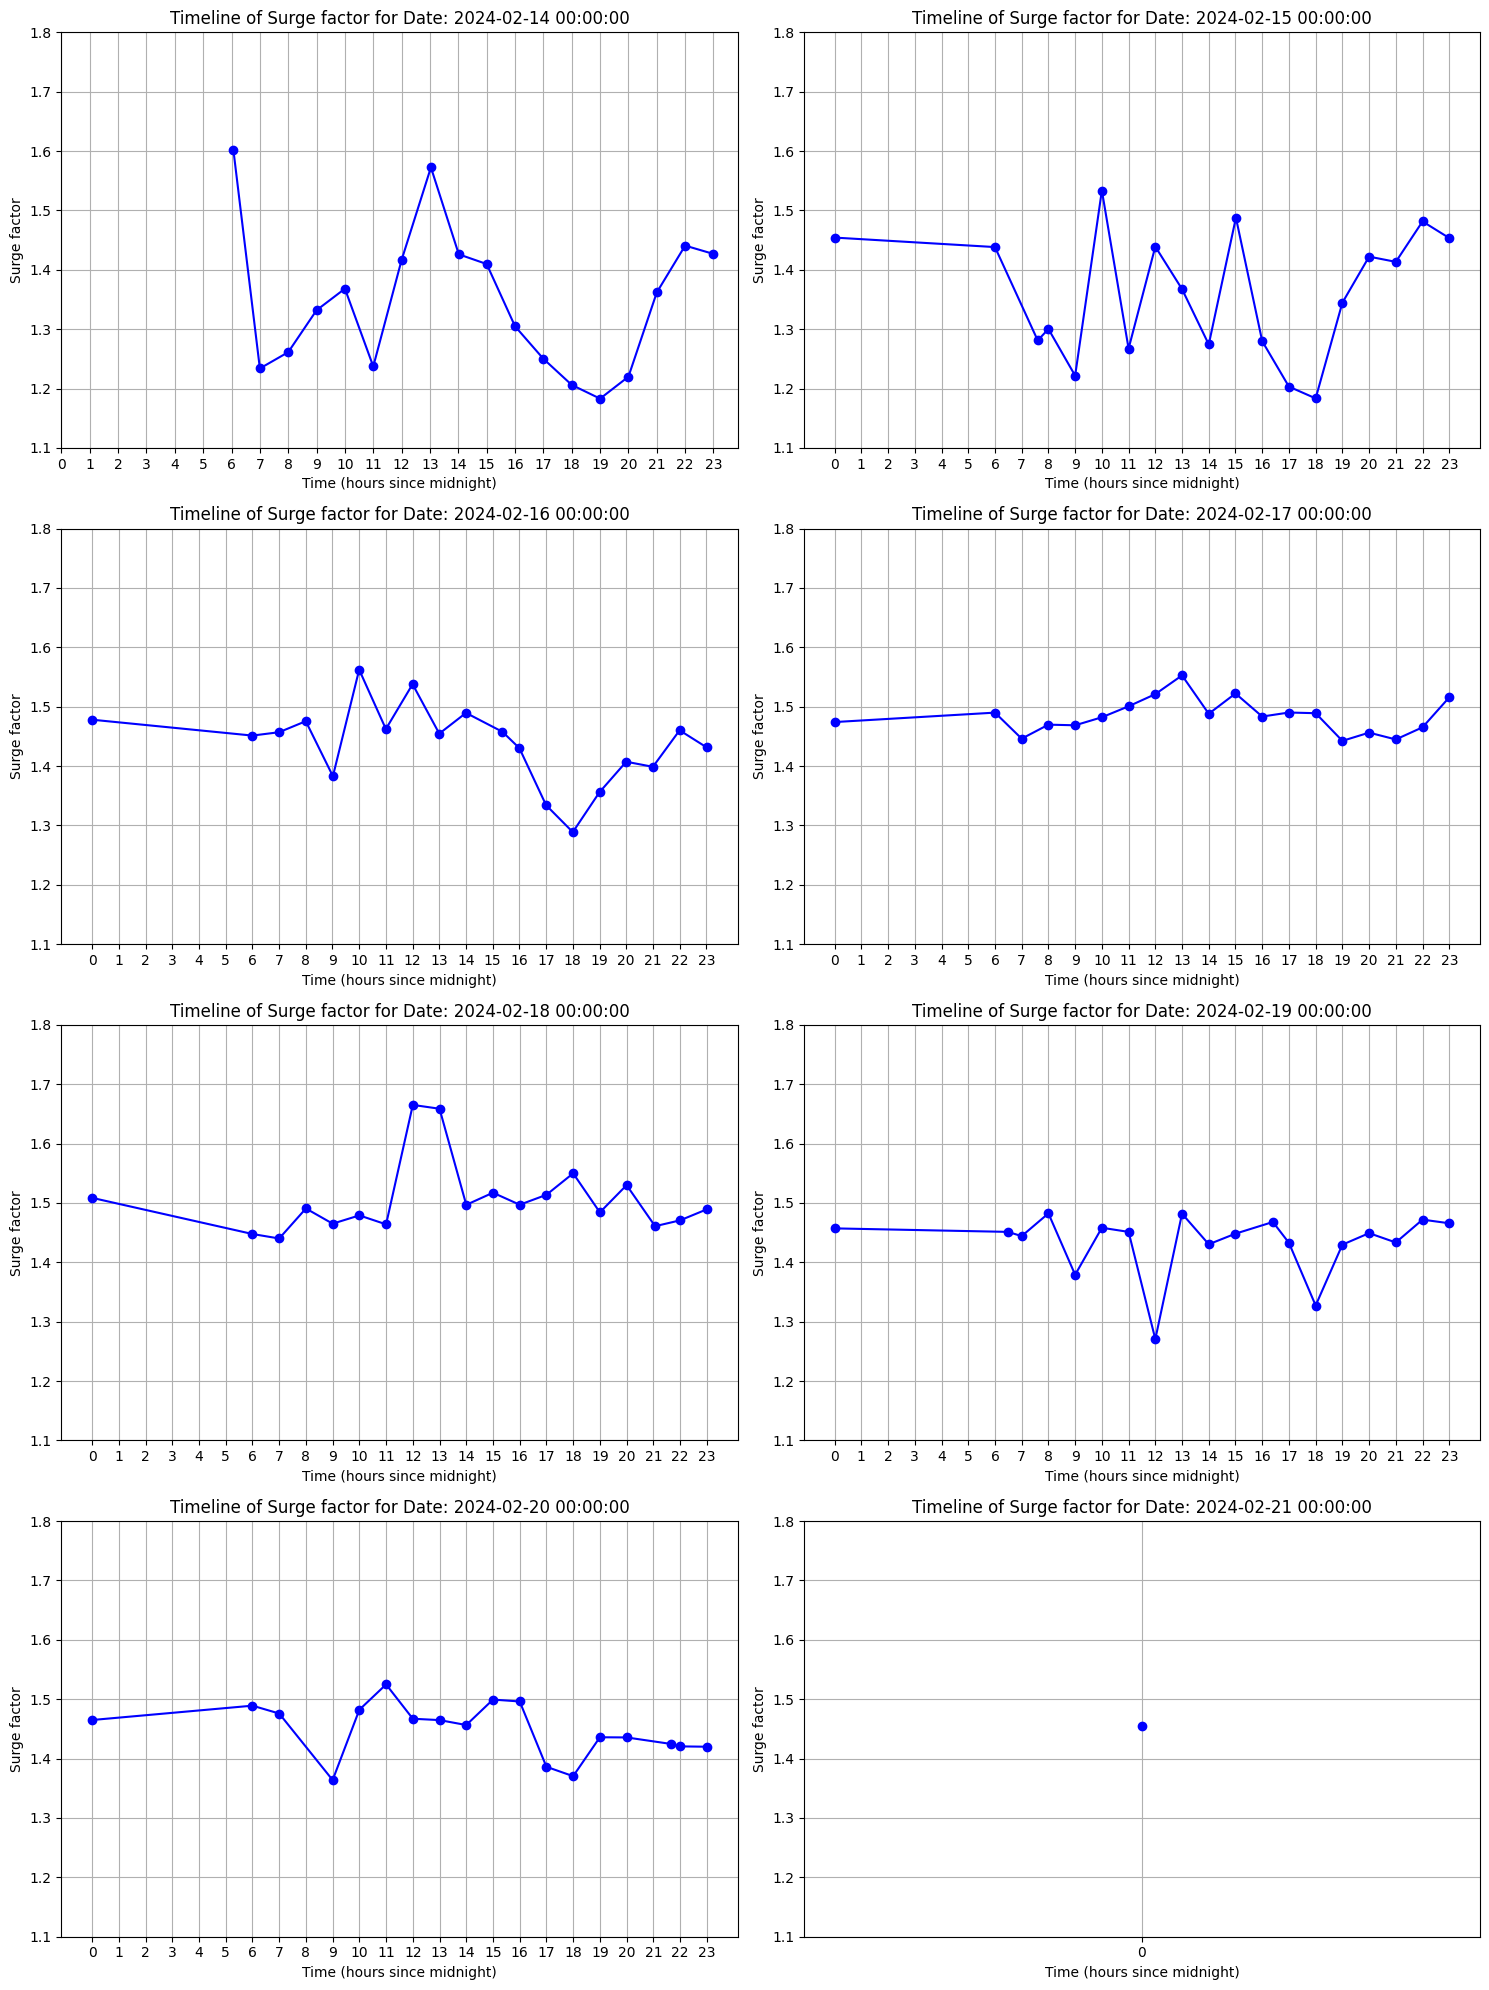

In [88]:
# DO NOT EDIT !!!

df = pd.read_excel("/content/GRAB APP AND API DATA.xlsx", skiprows=13)

df = df[(df['app_destination']=="UP Alumni Hostel")]

df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
grouped1 = df.groupby('date')

df['app_booking hour'] = df['app_booking hour'].astype(str).str[:-3]
df['app_booking hour'] = pd.to_datetime(df['app_booking hour'], format='%H:%M').dt.time

df['app_booking hour_hours'] = df['app_booking hour'].apply(lambda t: t.hour + t.minute / 60 + t.second / 3600)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for i, (date, group) in enumerate(grouped1):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.plot(group['app_booking hour_hours'], group['Surge factor'], marker='o', linestyle='-', label=f'Date: {date}', color='b')
    ax.set_xlabel('Time (hours since midnight)')
    ax.set_ylabel('Surge factor')
    ax.set_title(f'Timeline of Surge factor for Date: {date}')
    ax.grid(True)
    ax.set_ylim(1.1, 1.8)

    # Set x-ticks to appear every 1 hour
    ax.set_xticks(range(0, int(group['app_booking hour_hours'].max()) + 1))

plt.tight_layout()
plt.show()

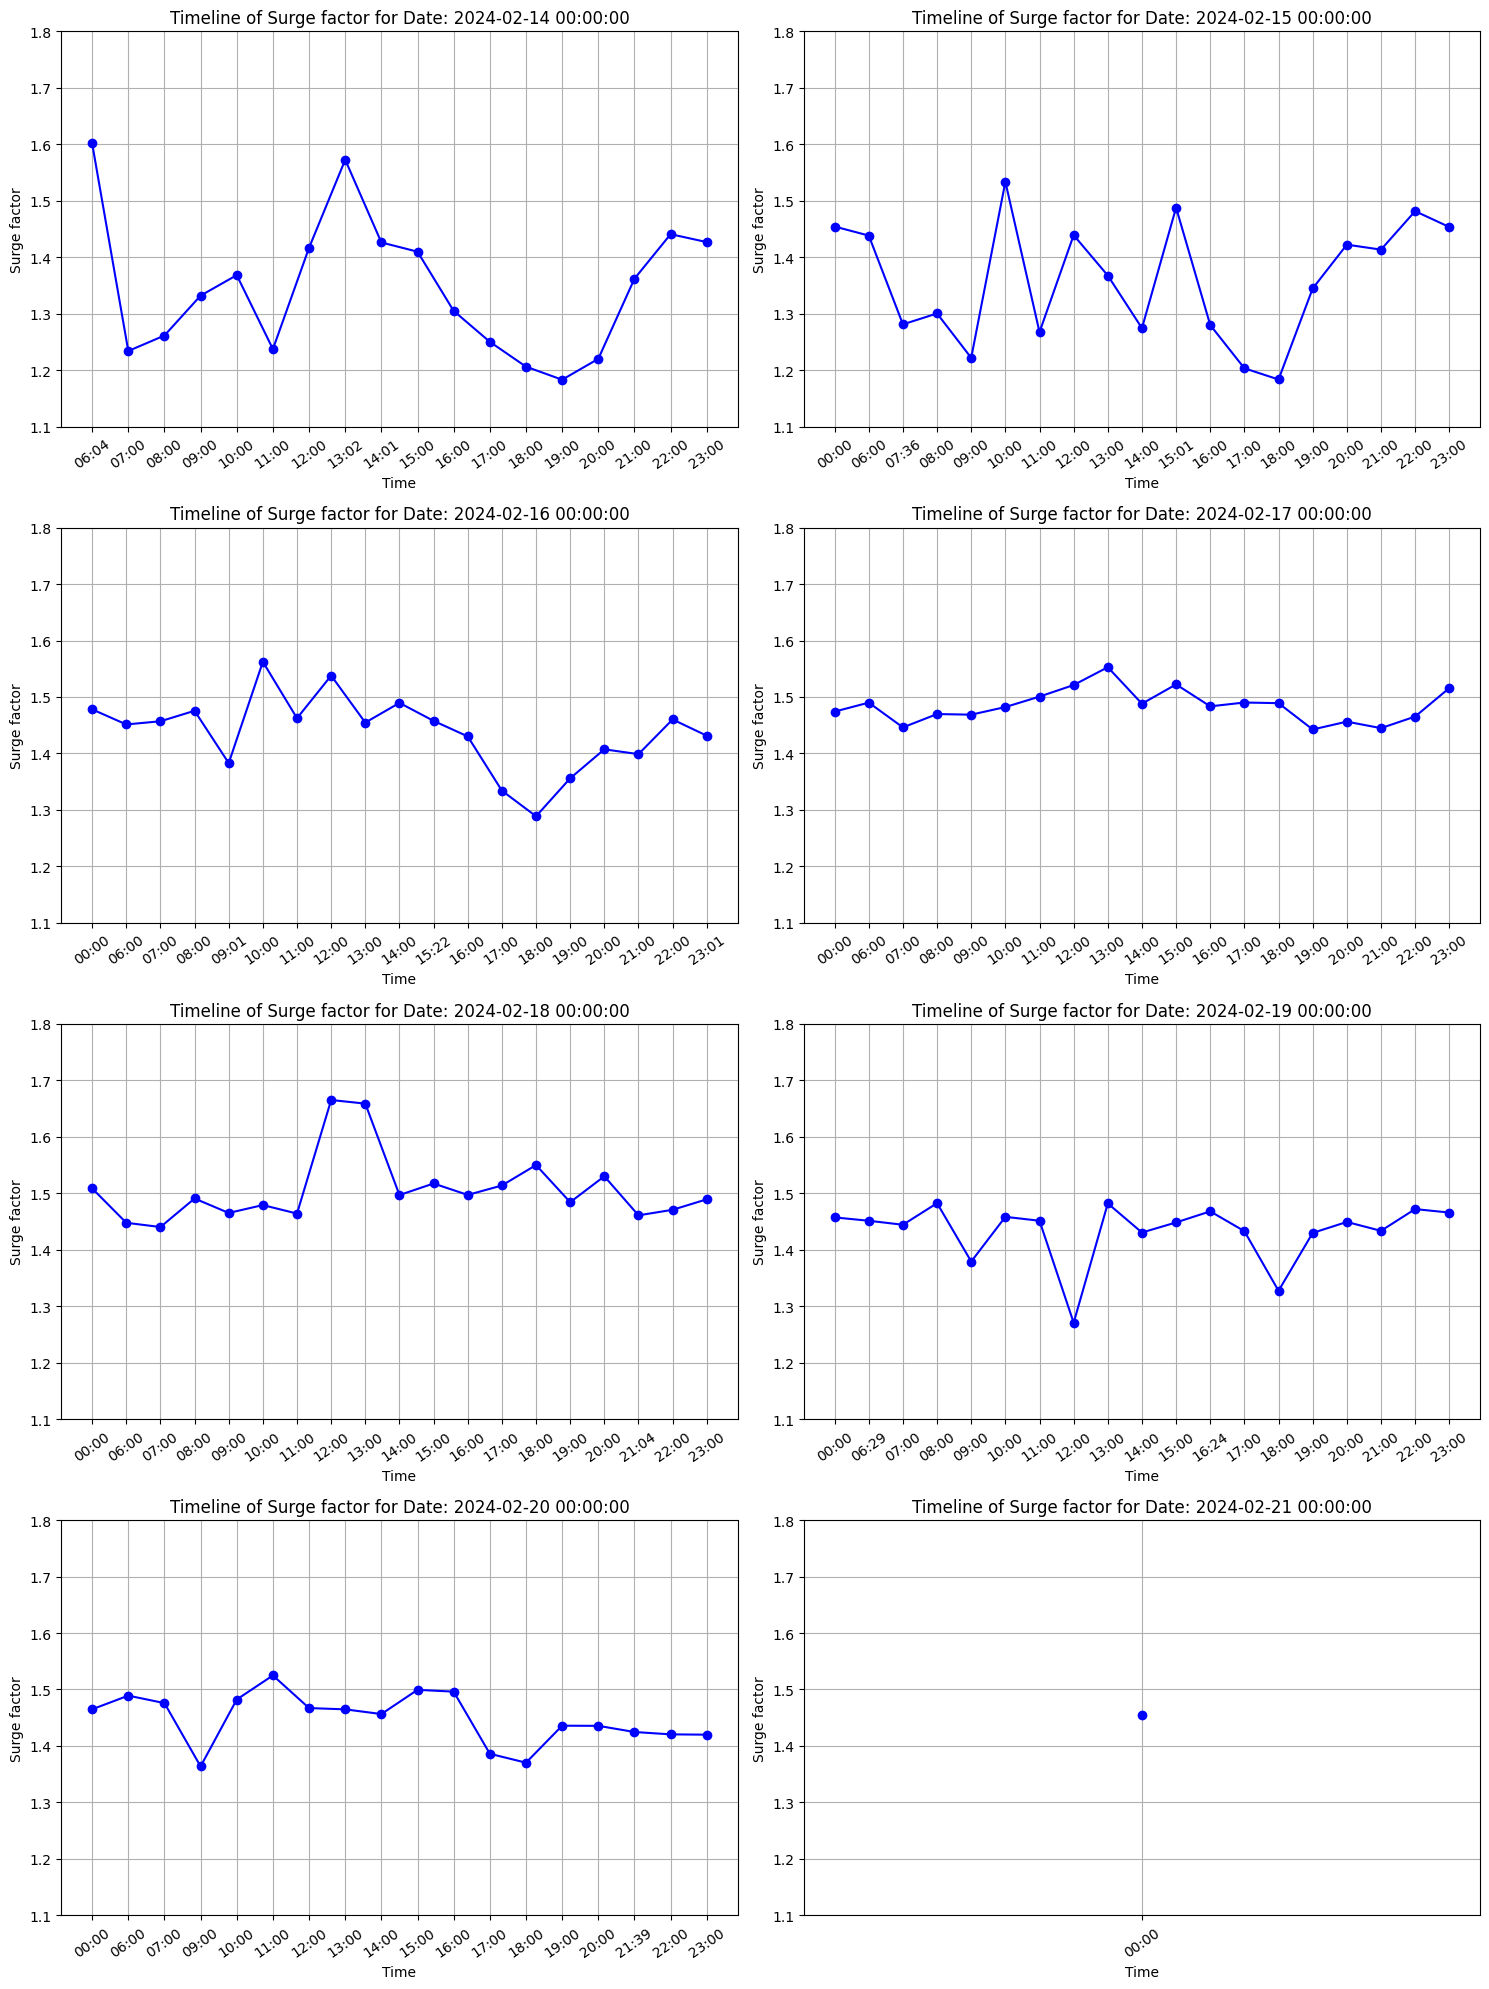

In [85]:
# DO NOT EDIT !!!

df = pd.read_excel("/content/GRAB APP AND API DATA.xlsx", skiprows=13)

df = df[(df['app_destination']=="UP Alumni Hostel")]

df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
grouped1 = df.groupby('date')

df['app_booking hour'] = df['app_booking hour'].astype(str).str[:-3]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for i, (date, group) in enumerate(grouped1):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.plot(group['app_booking hour'], group['Surge factor'], marker='o', linestyle='-', label=f'Date: {date}', color='b')
    ax.set_xlabel('Time')
    ax.set_ylabel('Surge factor')
    ax.set_title(f'Timeline of Surge factor for Date: {date}')
    ax.grid(True)
    ax.tick_params(axis='x', labelrotation=35)
    ax.set_ylim(1.1, 1.8)

plt.tight_layout()
plt.show()
